# The Space-Arrow of Space-time

People have claimed Nature does not have an arrow for time. I don't think the question, as stated, is well-formed. Any analysis of the arrow of time for one observer will look like the arrow of space-time to another one moving relative to the first.

Two different problems are often cited on this subject. The first is that the fundamental forces of the standard model - EM, the weak force, and the strong force - are unaltered by a change in the arrow of (space-)time. Second, that the Lorentz group can be used an arbitrary number of times and still flip the value of time precisely.

In this short talk, I will show how keeping the space terms next to the time ones leads to the world we know, where space-time reversal does not come easy.

## Space-time Reversal in EM

Let me provide a quick sketch of how to derive the Maxwell source equations, not just write them down like Minkowski did. The goal is to calculate the Lorentz invariant quantity $B^2 - E^2$, the difference of two squares. Based on high school algebra, this should be obtained by the product of the sum and difference of $E$ and $B$. Once one has this difference of squares, the Euler-Lagrange equations to derive Gauss's and Ampere's laws. 

Start all the ways a 4-potential can change in space-time (doesn't that sound general?):

![](images/DA.png)

The first term is a gauge field. Since photons are being studied, this gauge field has to be set to zero. For anything that is not a photon, this field will be non-zero. It is interesting to me that it is just "naturally" here. It can be zeroed out easily enough:

![](images/DA_no_scalar_EB.png)

By changing the order of the differential acting on the potential, only the magnetic field $B$ will change signs.

![](images/AD_no_scalar_EB.png)

Form the product of these two:

![](images/B2-E2.png)

The first observation to make that everyone makes is that reversing time will never, ever change the value of the difference between the square of the magnetic field and the square of the electric field. That is what a square does. This is why one can conclude with confidence that the fundamental forces in physics are unaltered by changes in time. The weak and strong forces are mere variations on EM using other gauge groups.

The second observation that no one makes is that the Poynting vector is sitting right next door. The Poynting vector will change signs under time reversal. A complete analysis of EM must include the part that responds to time reversal. By omitting it, a mystery is claimed.

## Space-time Reversal is Locally Irreversible

In this notebook, I will show two different ways how when one thinks about space-time reversal instead of just time reversal using space-time numbers, that such a system cannot be reversed an arbitrarily large number of times as is the case for the Lorentz group. First the tools need to work with space-time numbers have to loaded.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
import Q_tools as qt;

The member of the Lorentz group that reverses time is remarkably simple: it is a matrix that has minus one in the upper diagonal position, positive one for the other diagonal positions, and zeros elsewhere.

In [2]:
TimeReversal = np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
display(TimeReversal)

array([[-1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

Create a 4-vector.

In [3]:
t, x, y, z = sp.symbols("t x y z")

In [4]:
Vector = np.array([t, x, y, z])
display(Vector)

array([t, x, y, z], dtype=object)

In [5]:
display(Vector * TimeReversal)

array([[-t, 0, 0, 0],
       [0, x, 0, 0],
       [0, 0, y, 0],
       [0, 0, 0, z]], dtype=object)

Do the time reversal a bunch of times.

In [6]:
display(Vector * TimeReversal * TimeReversal)
display(Vector * TimeReversal * TimeReversal * TimeReversal)

array([[t, 0, 0, 0],
       [0, x, 0, 0],
       [0, 0, y, 0],
       [0, 0, 0, z]], dtype=object)

array([[-t, 0, 0, 0],
       [0, x, 0, 0],
       [0, 0, y, 0],
       [0, 0, 0, z]], dtype=object)

It comes as no surprise that if the time-reversal member of the Lorentz group is done an even number of times, then nothing changes, but an odd number of times reverses time exactly.

For the quaternion approach, one solves a pretty simple algebraic expression instead of using a global matrix. The equation to solve is:
$$ P T_r = - P^* $$
Solve for $T_r$:
$$ T_r = - P^{-1} P^* $$

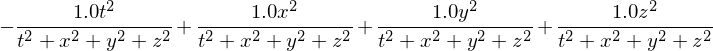

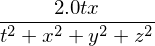

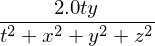

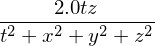

In [7]:
P = qt.QH([t, x, y, z])
Tr = P.flip_signs().invert().product(P.conj())
display(Tr.t)
display(Tr.x)
display(Tr.y)
display(Tr.z)

Does this considerably more complicated expression than the Lorentz group do its job? Of course is **should**, but let's just show this is the case:

In [8]:
PFlip = P.product(Tr)
display(sp.simplify(PFlip.t))
display(sp.simplify(PFlip.x))
display(sp.simplify(PFlip.y))
display(sp.simplify(PFlip.z))

Apply Tr twice to see if one gets back to the start point.

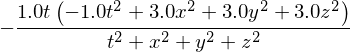

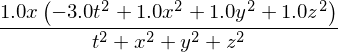

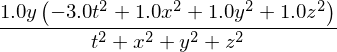

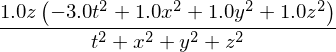

In [9]:
PFlipFlip = P.product(Tr).product(Tr)
display(sp.simplify(PFlipFlip.t))
display(sp.simplify(PFlipFlip.x))
display(sp.simplify(PFlipFlip.y))
display(sp.simplify(PFlipFlip.z))

This may not look "right" to the eye, so test it. Use "classical" values, meaning time $t >>> x, y, z$. 

In [10]:
Classical_subs = {t:1, x:0.0000000002, y:0.00000000012, z:-0.0000000003}
display(sp.simplify(PFlip.t.subs(Classical_subs)))
display(sp.simplify(PFlip.x.subs(Classical_subs)))
display(sp.simplify(PFlip.y.subs(Classical_subs)))
display(sp.simplify(PFlip.z.subs(Classical_subs)))
print()
display(sp.simplify(PFlipFlip.t.subs(Classical_subs)))
display(sp.simplify(PFlipFlip.x.subs(Classical_subs)))
display(sp.simplify(PFlipFlip.y.subs(Classical_subs)))
display(sp.simplify(PFlipFlip.z.subs(Classical_subs)))

The value for t returned to unity as it should, but the same cannot be said for the spatial terms. This is due to the cross product. See what happens if one does this many, many times. Define a function to do the work.

In [11]:
def reverse_n_times(P1, T1, sub_1, n):
    """Given a symbolic expression P, applies symbolic space-time reversal using a dictionary of values n times."""

    P1_t, P1_x, P1_y, P1_z = P1.t.subs(sub_1), P1.x.subs(sub_1), P1.y.subs(sub_1), P1.z.subs(sub_1)
    P_result = qt.QH([P1_t, P1_x, P1_y, P1_z])
    
    T1_t, T1_x, T1_y, T1_z = T1.t.subs(sub_1), T1.x.subs(sub_1), T1.y.subs(sub_1), T1.z.subs(sub_1)
    T_sub = qt.QH([T1_t, T1_x, T1_y, T1_z])

    for i in range(n):
        P_result = P_result.product(T_sub)
        
    return P_result

In [12]:
print(reverse_n_times(P, Tr, Classical_subs, 100))
print(reverse_n_times(P, Tr, Classical_subs, 101))
print(reverse_n_times(P, Tr, Classical_subs, 1000))
print(reverse_n_times(P, Tr, Classical_subs, 1001))

(1.00000000000000, -3.97999999999999E-8, -2.38800000000001E-8, 5.96999999999999E-8) ...
(-1.00000000000000, 4.01999999999999E-8, 2.41200000000001E-8, -6.02999999999999E-8) ...
(0.999999999999712, -3.99799999999961E-7, -2.39879999999978E-7, 5.99699999999939E-7) ...
(-0.999999999999712, 4.00199999999961E-7, 2.40119999999978E-7, -6.00299999999938E-7) ...


In [ ]:
print(reverse_n_times(P, Tr, Classical_subs, 10000))
print(reverse_n_times(P, Tr, Classical_subs, 100000))

(0.999999999971126, -0.00000399979999996151, -0.00000239987999997690, 0.00000599969999994228) ...
(0.999999997112059, -0.0000399997999614952, -0.0000239998799768971, 0.0000599996999422425) ...


In [ ]:
print(reverse_n_times(P, Tr, Classical_subs, 1000000))
print(reverse_n_times(P, Tr, Classical_subs, 10000000))

(0.999999711200594, -0.000399999761493507, -0.000239999856896105, 0.000599999642240260) ...
